<a href="https://colab.research.google.com/github/henryspg/DS-Unit-1-Sprint-2-Statistics/blob/master/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

**1) Write a function**

In [16]:
# What is the probability that a person is drunk after one positive breathalyzer test?
# prior prob
p_drunk = 0.001

# true drunk rate
p_pos_drunk = 1
# false positive rate
p_pos_not_drunk = 0.08
# complement prior
p_not_drunk = 1 - p_drunk

numerator = p_pos_drunk * p_drunk
denominator = p_pos_drunk*p_drunk + p_pos_not_drunk*p_not_drunk
P_posterior = numerator/denominator
print(P_posterior)


0.012357884330202669


**Below is manual calculation (without function) for my own exercise**

In [18]:
# What is the probability that a person is drunk after two positive breathalyzer tests?

# prior prob
p_drunk = 0.012357884330202669

# true drunk rate
p_pos_drunk = 1
# false positive rate
p_pos_not_drunk = 0.08
# complement prior
p_not_drunk = 1 - p_drunk

numerator = p_pos_drunk * p_drunk
denominator = p_pos_drunk*p_drunk + p_pos_not_drunk*p_not_drunk
P_posterior = numerator/denominator
print(P_posterior)

0.13525210993291495


In [3]:
# What is the probability that a person is drunk after 3 positive breathalyzer tests?

# prior prob
p_drunk = 0.13525210993291495

# true drunk rate
p_pos_drunk = 1
# false positive rate
p_pos_not_drunk = 0.08
# complement prior
p_not_drunk = 1 - p_drunk

numerator = p_pos_drunk * p_drunk
denominator = p_pos_drunk*p_drunk + p_pos_not_drunk*p_not_drunk
P_posterior = numerator/denominator
print(P_posterior)

0.6615996951348605


In [4]:
# What is the probability that a person is drunk after 4 positive breathalyzer tests?
# prior prob
p_drunk = 0.6615996951348605

# true drunk rate
p_pos_drunk = 1
# false positive rate
p_pos_not_drunk = 0.08
# complement prior
p_not_drunk = 1 - p_drunk

numerator = p_pos_drunk * p_drunk
denominator = p_pos_drunk*p_drunk + p_pos_not_drunk*p_not_drunk
P_posterior = numerator/denominator
print(P_posterior)

0.9606895076105054


After 4 test, The result is >95%.  
  
We need 4 positive breathalyzer tests in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit

**Below is is using function**

In [64]:
# Using the fuction:

def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  p_drunk = prob_drunk_prior

  probs = []

  for i in range(1,8):
    p_pos_drunk = true_positive_rate
    p_pos_not_drunk = false_positive_rate
    p_not_drunk = 1 - p_drunk
    numerator = p_pos_drunk * p_drunk
    denominator = p_pos_drunk*p_drunk + p_pos_not_drunk*p_not_drunk

    P_posterior = numerator/denominator
    p_drunk = P_posterior
    probs.append(p_drunk)
    # print("test number: ",i, ">> ",P_posterior)
  return probs

P_posterior = prob_drunk_given_positive(0.001,0.08,1)
print(P_posterior)
# print("Conclusion:  4 tests are needed to get probability > 95%")

[0.012357884330202669, 0.13525210993291495, 0.6615996951348605, 0.9606895076105054, 0.9967371577896734, 0.9997381867081508, 0.9999790498904363]


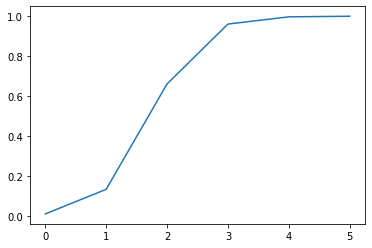

In [63]:
import matplotlib.pyplot as plt
plt.plot(P_posterior)
plt.show()

In [57]:
# Another way of showing probs.  in the form of 1 number. 

def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate, nroftime):
  p_drunk = prob_drunk_prior


  for i in range(1,nroftime):
    p_pos_drunk = true_positive_rate
    p_pos_not_drunk = false_positive_rate
    p_not_drunk = 1 - p_drunk
    numerator = p_pos_drunk * p_drunk
    denominator = p_pos_drunk*p_drunk + p_pos_not_drunk*p_not_drunk
    
    P_posterior = numerator/denominator
    p_drunk = P_posterior
    print("test number: ",i, ">> ",P_posterior)
  return p_drunk

P_posterior = prob_drunk_given_positive(0.001,0.08,1,7)
print()
print("Conclusion:  4 tests are needed to get probability > 95%")

test number:  1 >>  0.012357884330202669
test number:  2 >>  0.13525210993291495
test number:  3 >>  0.6615996951348605
test number:  4 >>  0.9606895076105054
test number:  5 >>  0.9967371577896734
test number:  6 >>  0.9997381867081508

Conclusion:  4 tests are needed to get probability > 95%


**2) Explore scipy.stats.bayes_mvs**

https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.bayes_mvs.html  
scipy.stats.bayes_mvs(arr, alpha) function computes mean, variance and standard deviation in the given Bayesian confidence interval.  
Bayesian confidence intervals for the mean, var, and std.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get data from house-votes-84

In [66]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-14 02:09:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-05-14 02:09:04 (278 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [76]:
colom=['party', 'handicapped-infants', 'water-project', 'budget-resolution', 'physician-fee-freeze','el-salvador-aid', 'relig-grp-schools','anti-satellite-ban',
                            'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels','education-spending', 'right-to-sue', 'crime', 'duty-free', 'export-SA']

df = pd.read_csv('house-votes-84.data', names = colom)
df=df.replace({'y': 1, 'n': 0 , '?':np.NaN  })
df.shape

(435, 17)

In [0]:
##  dataframe for  both party:

rep_withNaN = df[df['party']=='republican']
dem_withNaN = df[df['party']=='democrat']

In [0]:
# To see the  stats, NaN must be dropped
# check for immigration column

house_im = df['immigration'].dropna()
rep_im = rep_withNaN['immigration'].dropna()
dem_im = dem_withNaN['immigration'].dropna()

In [88]:
# Both party on Immigration

len(house_im)

428

In [0]:
# from scipy import stats

# def confidence_interval(data, confidence=0.95):
#   data = np.array(data)
#   x_bar = np.mean(data)
#   n = 427
#   s = np.std(data, ddof=1)
#   std_err = s / np.sqrt(n)
#   t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
#   margin_of_error = t*std_err
#   lower_bound = x_bar - margin_of_error
#   upper_bound = x_bar + margin_of_error
#   return (lower_bound, x_bar, upper_bound)

In [110]:
frequentist = confidence_interval(house_im)
frequentist

(0.45705954454897885, 0.5046728971962616, 0.5522862498435444)

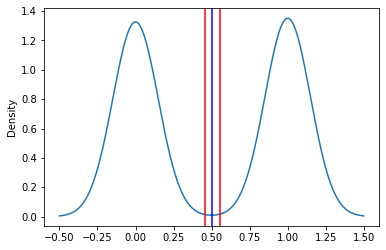

In [111]:
house_im.plot.density()
plt.axvline(frequentist[0], color='red')
plt.axvline(frequentist[1], color='blue')
plt.axvline(frequentist[2], color='red')
plt.show()

**3) In your own words, summarize the difference between Bayesian and Frequentist statistics**

Frequentist confidence intervals treat the parameter as fixed and the data as random.  The source data is fixed


Bayesian: parameter's value is fixed but has been chosen from some probability distribution -- known as the prior probability distribution.  
      Bayesian credibile intervals treat the parameter as random and the data as fixed and creates a distribution of reasonable values for the parameter, given the observed data. There is an "iteration process" to get the desired probability.  The value of the output becomes the input value.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!